In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import KernelPCA
%matplotlib inline

In [2]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [3]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [4]:
df_train = train_normal[(train_normal.simulationRun>=1)&
                                 (train_normal.simulationRun<5)].iloc[:,3:]

df_test = train_normal[(train_normal.simulationRun>5)&
                                (train_normal.simulationRun<10)].iloc[:,3:]

### Train

In [5]:
# the mean and std
mu_train = df_train.mean(axis=0)
std_train = df_train.std(axis=0)

In [6]:
# normalizing training data
X = np.array(((df_train - mu_train)/std_train))

In [7]:
X.shape

(2000, 52)

In [8]:
kpca = KernelPCA() 
kpcat = kpca.fit_transform(X)

In [9]:
kpcat.shape

(2000, 52)

In [10]:
L = kpca.eigenvalues_

In [11]:
L.shape

(52,)

In [12]:
P = kpca.eigenvectors_.T

In [13]:
P.shape

(52, 2000)

In [14]:
conf_T2 = 0.99

In [15]:
# limit of the T^2 statistic
from scipy.stats import f
F = f.ppf(conf_T2, 52, X.shape[0]-52)

In [16]:
T2_lim = ((52*(X.shape[0]**2-1))/(X.shape[0]*(X.shape[0]-52)))*F

### Test

In [17]:
IDV = 1
df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
                               (test_faulty.simulationRun==1)].iloc[:,3:]

In [18]:
Xt = np.array((df_test - mu_train)/std_train)

In [19]:
Xt.shape

(960, 52)

In [20]:
P[:,:52]

array([[-6.20769948e-05, -7.61391924e-04,  7.57745152e-04, ...,
         1.78223809e-02,  2.39561614e-02,  2.28408337e-02],
       [-4.65880913e-03,  7.21150055e-04, -6.01273347e-04, ...,
        -3.33695021e-04,  2.22174848e-03,  2.97980204e-03],
       [ 8.58241009e-04, -9.23134036e-03, -1.17745970e-02, ...,
         2.30615950e-02,  6.82544410e-03,  1.50406119e-02],
       ...,
       [ 5.53672185e-03,  4.81433502e-03, -1.24390158e-02, ...,
         2.34059981e-02,  4.10398486e-02,  3.35663080e-02],
       [ 3.05457324e-02,  1.56026507e-03,  2.92493357e-02, ...,
         1.64957748e-02,  3.19910137e-02,  1.44186629e-02],
       [ 7.36538976e-03, -2.03821522e-02, -2.22145646e-02, ...,
         1.58277009e-02,  2.98979380e-02, -4.86720506e-03]])

In [21]:
P[:,:52].shape

(52, 52)

In [22]:
T = Xt@P[:,:52]

In [23]:
T.shape

(960, 52)

In [24]:
T2 = np.array([T[i,:]@np.linalg.inv(np.diag(L[:52]))@T[i,:].T for i in range (Xt.shape[0])])

In [25]:
T2.shape

(960,)

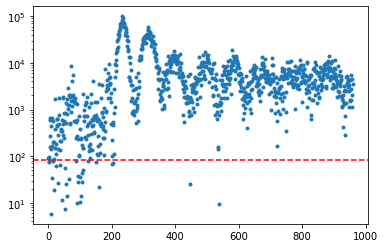

In [26]:
plt.semilogy(T2,'.')
plt.axhline(T2_lim,ls='--',c='r');

In [27]:
print(f'T2: {(T2>T2_lim).sum()/T2.shape[0]}')

T2: 0.9666666666666667
